In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('video_cpu_vs_gpu_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

  tipo                     video  frame image_size  threshold      time       fps                                                                                                                                                                                                                                                                                                                                                                                                                                  keypoints
0  cpu  ejercicio01 - frente.mp4      0    480x864        0.1  0.372668  2.683353  [[[252.65625 326.53125]\n  [269.53125 318.09375]\n  [244.21875 309.65625]\n  [286.40625 326.53125]\n  [218.90625 318.09375]\n  [311.71875 410.90625]\n  [193.59375 410.90625]\n  [337.03125 495.28125]\n  [159.84375 495.28125]\n  [345.46875 579.65625]\n  [159.84375 571.21875]\n  [294.84375 554.34375]\n  [210.46875 554.34375]\n  [345.46875 647.15625]\n  [151.40625 655.59375]\n  [328.59375 790.59375]\n  [159.8

# Histogramas

/var/folders/jf/mtmp9vvj5qdfvc_x4zl5yz7m0000gn/T/ipykernel_17822/139657618.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


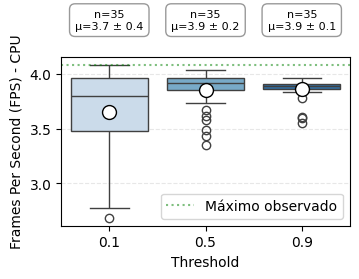

In [2]:
# Filtrar datos de CPU
df_cpu = df[df['tipo'] == 'cpu']

plt.figure(figsize=(3.7, 3))  # Aumentar tamaño para mejor legibilidad

# Configurar el tamaño de fuente global
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Boxplot para FPS
ax = sns.boxplot(
    data=df_cpu,
    x='threshold',
    y='fps',
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':10},
    palette='Blues'
)

# Personalización del gráfico
plt.xlabel('Threshold')
plt.ylabel('Frames Per Second (FPS) - CPU')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calcular estadísticas para cada threshold
fps_stats = df_cpu.groupby('threshold')['fps'].agg(['count', 'mean', 'std'])

# Añadir anotaciones de estadísticas
for i, threshold in enumerate(fps_stats.index):
    plt.text(
        i, df_cpu['fps'].max() * 1.08,  # Posición ajustada al máximo FPS
        f"n={int(fps_stats.loc[threshold, 'count'])}\nμ={fps_stats.loc[threshold, 'mean']:.1f} ± {fps_stats.loc[threshold, 'std']:.1f}",
        ha='center',
        fontsize=8,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
    )

# Añadir línea horizontal de referencia (opcional)
max_fps = df_cpu['fps'].max()
plt.axhline(y=max_fps, color='green', linestyle=':', alpha=0.5, label='Máximo observado')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

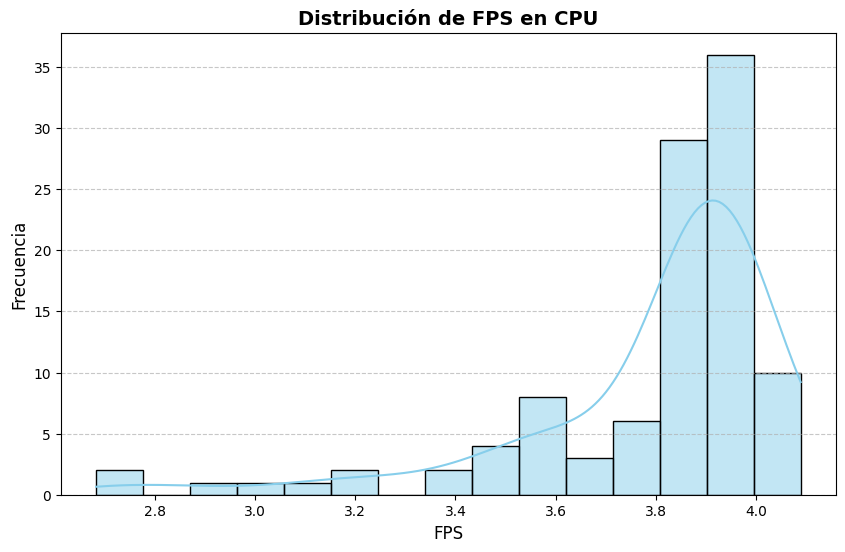

In [3]:
# Filtrar datos de CPU
df_cpu = df[df['tipo'] == 'cpu']

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_cpu['fps'], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de FPS en CPU', fontweight='bold', fontsize=14)
plt.xlabel('FPS', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
ap_stats = df.groupby('threshold')['fps'].describe()
print(ap_stats.to_string())

           count      mean       std       min       25%       50%       75%       max
threshold                                                                             
0.1         35.0  3.658937  0.393524  2.683353  3.479061  3.800114  3.965102  4.088757
0.5         35.0  3.855555  0.171948  3.356525  3.853170  3.918834  3.970183  4.039506
0.9         35.0  3.864889  0.092185  3.557971  3.864098  3.893023  3.914103  3.966871
